In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('creditcard.csv')
print("Dataset loaded")

Dataset loaded


In [4]:
print(df.head())
print(df.info())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

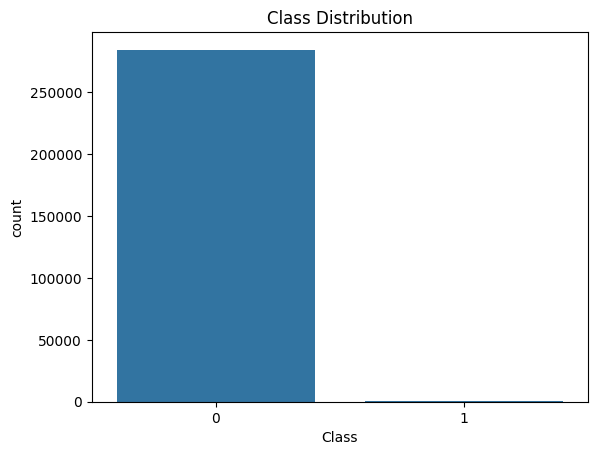

In [5]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [6]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop('Time', axis=1)

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("SMOTE applied")

SMOTE applied


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[85277    18]
 [   32   116]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.78      0.82       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443


ROC AUC Score: 0.9682318360919099


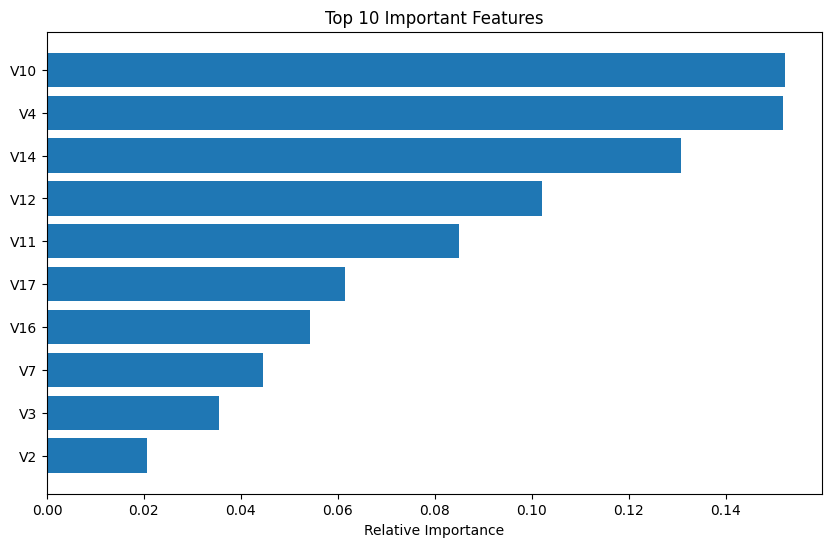

In [16]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
risk_levels = []
for score in y_proba:
    if score > 0.8:
        risk_levels.append("High Risk")
    elif score > 0.5:
        risk_levels.append("Medium Risk")
    else:
        risk_levels.append("Low Risk")

results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
results['Risk Score'] = y_proba
results['Risk Level'] = risk_levels
print("\nSample Transactions with Risk Classification:")
print(results[['Risk Score', 'Risk Level', 'Actual', 'Predicted']].head(10))


Sample Transactions with Risk Classification:
        Risk Score Risk Level  Actual  Predicted
186882        0.00   Low Risk       0          0
165754        0.00   Low Risk       0          0
235285        0.00   Low Risk       0          0
101271        0.01   Low Risk       0          0
5832          0.00   Low Risk       0          0
253774        0.00   Low Risk       0          0
113630        0.00   Low Risk       0          0
230121        0.00   Low Risk       0          0
282997        0.00   Low Risk       0          0
26831         0.00   Low Risk       0          0


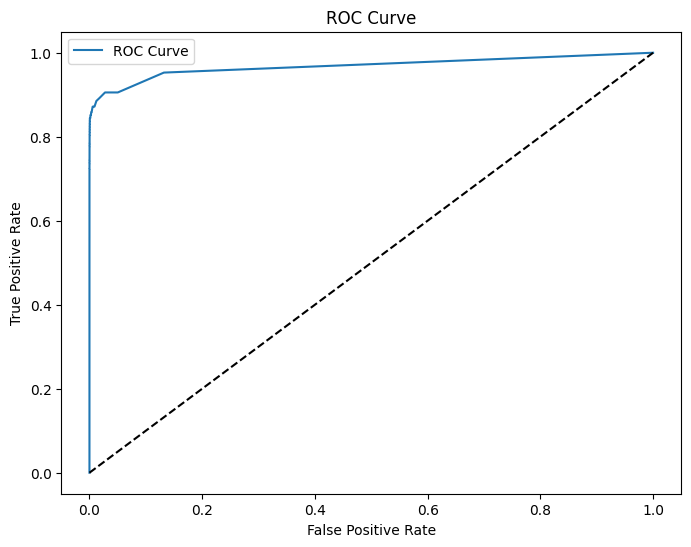

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()